In [2]:
import os
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# HW4

## Q1

100
100
100
(3, 50)


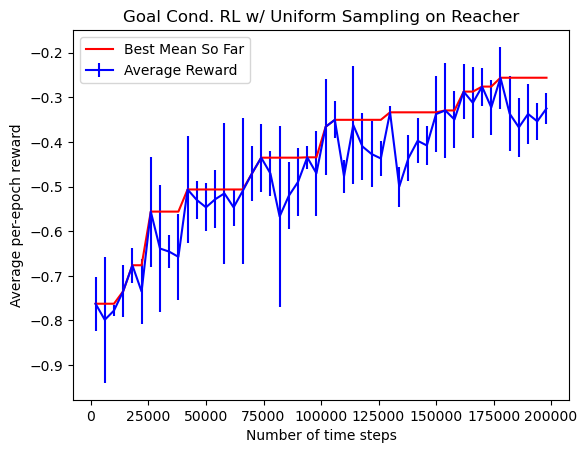

In [39]:
# read the data
log_file_path_exp1 = "../data/hw4_q1_reacher_reacher_30-03-2024_19-20-10/log_data.csv"
log_file_path_exp2 = "../data/hw4_q1_reacher_reacher_30-03-2024_20-15-33/log_data.csv"
log_file_path_exp3 = "../data/hw4_q1_reacher_reacher_30-03-2024_21-09-46/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

idx = [i*2 for i in range(50)]

# plot it
y1_avg_returns = log_data_exp1['eval_reward_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_reward_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_reward_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

y1_avg_returns = [y1_avg_returns[i] for i in idx]
y2_avg_returns = [y2_avg_returns[i] for i in idx]
y3_avg_returns = [y3_avg_returns[i] for i in idx]
x_timesteps = [x_timesteps[i] for i in idx]

y_avg_returns = []
for i in range(len(y1_avg_returns)):
    y_avg_returns.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_returns[:i+1]) for i in range(len(y_avg_returns))]

# cal. std dev of the mean curve
y_std_returns = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns.shape)
y_std_returns = np.std(y_std_returns, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_returns, y_std_returns, fmt='-', label='Average Reward', color='blue')

# plot the best mean so far
ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on Reacher")
plt.show()


100
100
100
(3, 50)


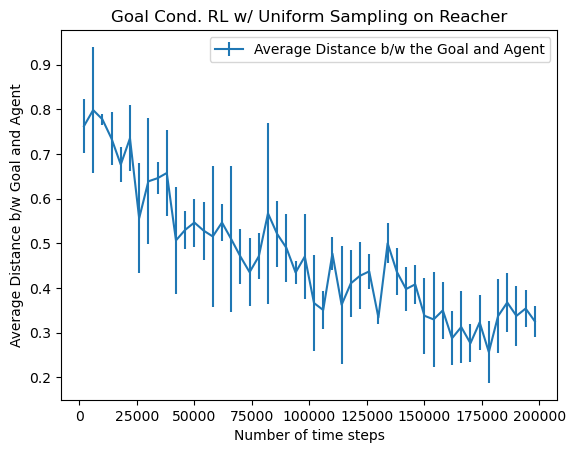

In [10]:
y1_dist_goal_agent = -1 * log_data_exp1['eval_reward_Average']; print(len(y1_dist_goal_agent))
y2_dist_goal_agent = -1 * log_data_exp2['eval_reward_Average']; print(len(y2_dist_goal_agent))
y3_dist_goal_agent = -1 * log_data_exp3['eval_reward_Average']; print(len(y3_dist_goal_agent))


y1_dist_goal_agent = [y1_dist_goal_agent[i] for i in idx]
y2_dist_goal_agent = [y2_dist_goal_agent[i] for i in idx]
y3_dist_goal_agent = [y3_dist_goal_agent[i] for i in idx]

y_avg_dist_goal_agent = []
for i in range(len(y1_dist_goal_agent)):
    y_avg_dist_goal_agent.append((float(y1_dist_goal_agent[i]) + float(y2_dist_goal_agent[i]) + float(y3_dist_goal_agent[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent = np.array([y1_dist_goal_agent, y2_dist_goal_agent, y3_dist_goal_agent], dtype=float)
print(y_std_dist_goal_agent.shape)
y_std_dist_goal_agent = np.std(y_std_dist_goal_agent, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_dist_goal_agent, y_std_dist_goal_agent, label='Average Distance b/w the Goal and Agent')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Distance b/w Goal and Agent")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on Reacher")
plt.show()


100
100
100
(3, 50)


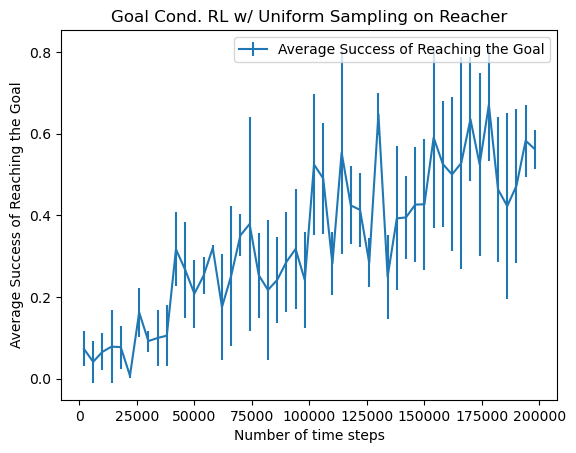

In [11]:
y1_sucess = log_data_exp1['eval_reached_goal_Average']; print(len(y1_sucess))
y2_sucess = log_data_exp2['eval_reached_goal_Average']; print(len(y2_sucess))
y3_sucess = log_data_exp3['eval_reached_goal_Average']; print(len(y3_sucess))

y1_sucess = [y1_sucess[i] for i in idx]
y2_sucess = [y2_sucess[i] for i in idx]
y3_sucess = [y3_sucess[i] for i in idx]


y_avg_sucess = []
for i in range(len(y1_sucess)):
    y_avg_sucess.append((float(y1_sucess[i]) + float(y2_sucess[i]) + float(y3_sucess[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_sucess[:i+1]) for i in range(len(y_avg_sucess))]

# cal. std dev of the mean curve
y_std_sucess = np.array([y1_sucess, y2_sucess, y3_sucess], dtype=float)
print(y_std_sucess.shape)
y_std_sucess = np.std(y_std_sucess, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_sucess, y_std_sucess, label='Average Success of Reaching the Goal')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Success of Reaching the Goal")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on Reacher")
plt.show()


### WidowX

100
69
38
(3, 35)


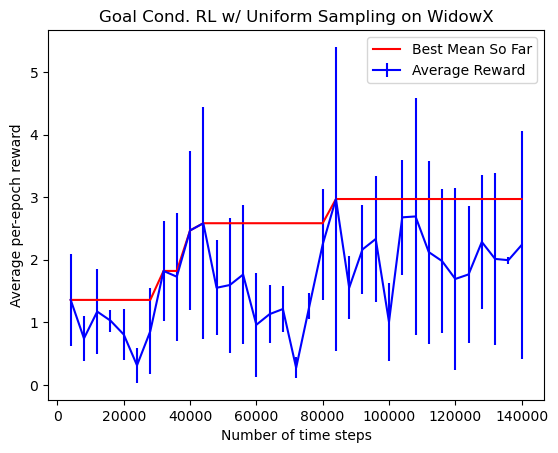

In [40]:
# read the data
log_file_path_exp1 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-07/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-13/log_data.csv"
log_file_path_exp3 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_04-38-23/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# idx = [i*2 for i in range(50)]

# plot it
y1_avg_returns = log_data_exp1['eval_reward_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_reward_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_reward_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

# y1_avg_returns = [y1_avg_returns[i] for i in idx]
# y2_avg_returns = [y2_avg_returns[i] for i in idx]
# y3_avg_returns = [y3_avg_returns[i] for i in idx]
# x_timesteps = [x_timesteps[i] for i in idx]

y1_avg_returns = y1_avg_returns[:35]
y2_avg_returns = y2_avg_returns[:35]
y3_avg_returns = y3_avg_returns[:35]
x_timesteps = x_timesteps[:35]

y_avg_returns = []
for i in range(len(y1_avg_returns)):
    y_avg_returns.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_returns[:i+1]) for i in range(len(y_avg_returns))]

# cal. std dev of the mean curve
y_std_returns = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns.shape)
y_std_returns = np.std(y_std_returns, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_returns, y_std_returns, fmt='-', label='Average Reward', color='blue')

# plot the best mean so far
ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on WidowX")
plt.show()


100
69
38
(3, 35)


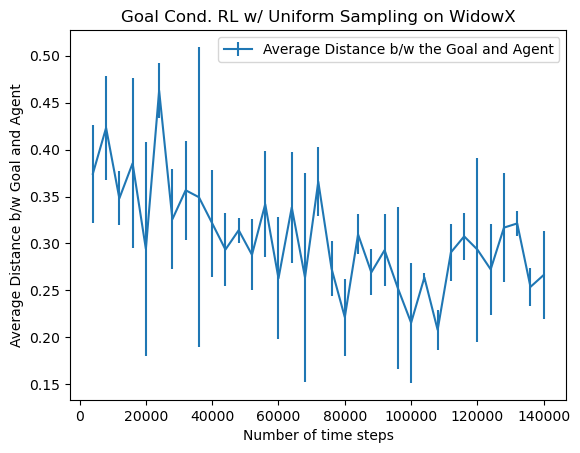

In [20]:
y1_dist_goal_agent = log_data_exp1['eval_euclidean_distance_Average']; print(len(y1_dist_goal_agent))
y2_dist_goal_agent = log_data_exp2['eval_euclidean_distance_Average']; print(len(y2_dist_goal_agent))
y3_dist_goal_agent = log_data_exp3['eval_euclidean_distance_Average']; print(len(y3_dist_goal_agent))

y1_dist_goal_agent = y1_dist_goal_agent[:35]
y2_dist_goal_agent = y2_dist_goal_agent[:35]
y3_dist_goal_agent = y3_dist_goal_agent[:35]

# y1_dist_goal_agent = [y1_dist_goal_agent[i] for i in idx]
# y2_dist_goal_agent = [y2_dist_goal_agent[i] for i in idx]
# y3_dist_goal_agent = [y3_dist_goal_agent[i] for i in idx]

y_avg_dist_goal_agent = []
for i in range(len(y1_dist_goal_agent)):
    y_avg_dist_goal_agent.append((float(y1_dist_goal_agent[i]) + float(y2_dist_goal_agent[i]) + float(y3_dist_goal_agent[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent = np.array([y1_dist_goal_agent, y2_dist_goal_agent, y3_dist_goal_agent], dtype=float)
print(y_std_dist_goal_agent.shape)
y_std_dist_goal_agent = np.std(y_std_dist_goal_agent, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_dist_goal_agent, y_std_dist_goal_agent, label='Average Distance b/w the Goal and Agent')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Distance b/w Goal and Agent")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on WidowX")
plt.show()


100
69
38
(3, 35)


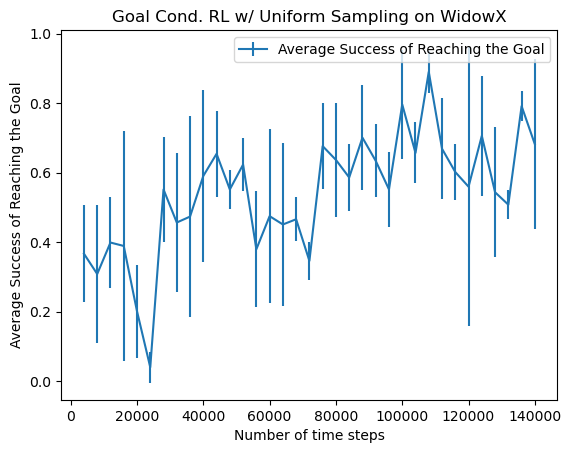

In [19]:
y1_sucess = log_data_exp1['eval_reached_goal_Average']; print(len(y1_sucess))
y2_sucess = log_data_exp2['eval_reached_goal_Average']; print(len(y2_sucess))
y3_sucess = log_data_exp3['eval_reached_goal_Average']; print(len(y3_sucess))

# y1_sucess = [y1_sucess[i] for i in idx]
# y2_sucess = [y2_sucess[i] for i in idx]
# y3_sucess = [y3_sucess[i] for i in idx]


y1_sucess = y1_sucess[:35]
y2_sucess = y2_sucess[:35]
y3_sucess = y3_sucess[:35]

y_avg_sucess = []
for i in range(len(y1_sucess)):
    y_avg_sucess.append((float(y1_sucess[i]) + float(y2_sucess[i]) + float(y3_sucess[i])) / 3)

# best mean of avg returns until that index
best_mean_so_far = [np.max(y_avg_sucess[:i+1]) for i in range(len(y_avg_sucess))]

# cal. std dev of the mean curve
y_std_sucess = np.array([y1_sucess, y2_sucess, y3_sucess], dtype=float)
print(y_std_sucess.shape)
y_std_sucess = np.std(y_std_sucess, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_sucess, y_std_sucess, label='Average Success of Reaching the Goal')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Success of Reaching the Goal")
ax.legend()
ax.set_title("Goal Cond. RL w/ Uniform Sampling on WidowX")
plt.show()


# Q2

### Reacher

100
100
100
(3, 50)
50
50
50
(3, 50)


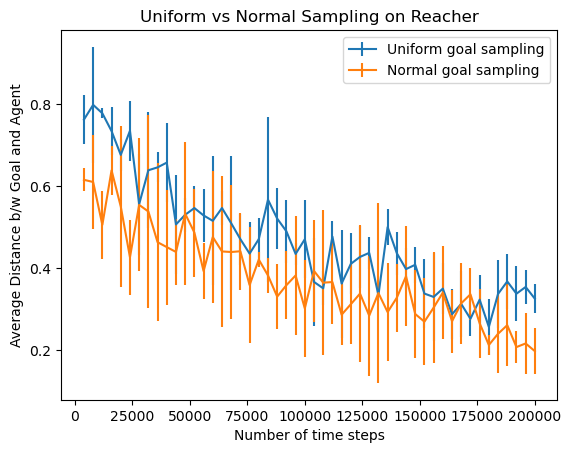

In [41]:
log_file_path_exp1 = "../data/hw4_q1_reacher_reacher_30-03-2024_19-20-10/log_data.csv"
log_file_path_exp2 = "../data/hw4_q1_reacher_reacher_30-03-2024_20-15-33/log_data.csv"
log_file_path_exp3 = "../data/hw4_q1_reacher_reacher_30-03-2024_21-09-46/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

idx = [i*2 for i in range(50)]

y1_dist_goal_agent = -1 * log_data_exp1['eval_reward_Average']; print(len(y1_dist_goal_agent))
y2_dist_goal_agent = -1 * log_data_exp2['eval_reward_Average']; print(len(y2_dist_goal_agent))
y3_dist_goal_agent = -1 * log_data_exp3['eval_reward_Average']; print(len(y3_dist_goal_agent))


y1_dist_goal_agent = [y1_dist_goal_agent[i] for i in idx]
y2_dist_goal_agent = [y2_dist_goal_agent[i] for i in idx]
y3_dist_goal_agent = [y3_dist_goal_agent[i] for i in idx]

y_avg_dist_goal_agent = []
for i in range(len(y1_dist_goal_agent)):
    y_avg_dist_goal_agent.append((float(y1_dist_goal_agent[i]) + float(y2_dist_goal_agent[i]) + float(y3_dist_goal_agent[i])) / 3)

# best mean of avg returns until that index
# best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent = np.array([y1_dist_goal_agent, y2_dist_goal_agent, y3_dist_goal_agent], dtype=float)
print(y_std_dist_goal_agent.shape)
y_std_dist_goal_agent = np.std(y_std_dist_goal_agent, axis=0)

########################################################################################################

# read the data
log_file_path_exp1_norm = "../data/hw4_q2_reacher_normal_reacher_01-04-2024_21-34-54/log_data.csv"
log_file_path_exp2_norm = "../data/hw4_q2_reacher_normal_reacher_01-04-2024_23-02-10/log_data.csv"
log_file_path_exp3_norm = "../data/hw4_q2_reacher_normal_reacher_02-04-2024_00-03-29/log_data.csv"

log_data_exp1_norm = pd.read_csv(log_file_path_exp1_norm)
log_data_exp2_norm = pd.read_csv(log_file_path_exp2_norm)
log_data_exp3_norm = pd.read_csv(log_file_path_exp3_norm)

x_timesteps = log_data_exp1_norm['step']

y1_dist_goal_agent_norm = -1 * log_data_exp1_norm['eval_reward_Average']; print(len(y1_dist_goal_agent_norm))
y2_dist_goal_agent_norm = -1 * log_data_exp2_norm['eval_reward_Average']; print(len(y2_dist_goal_agent_norm))
y3_dist_goal_agent_norm = -1 * log_data_exp3_norm['eval_reward_Average']; print(len(y3_dist_goal_agent_norm))


y_avg_dist_goal_agent_norm = []
for i in range(len(y1_dist_goal_agent_norm)):
    y_avg_dist_goal_agent_norm.append((float(y1_dist_goal_agent_norm[i]) + float(y2_dist_goal_agent_norm[i]) + float(y3_dist_goal_agent_norm[i])) / 3)

# best mean of avg returns until that index
# best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent_norm = np.array([y1_dist_goal_agent_norm, y2_dist_goal_agent_norm, y3_dist_goal_agent_norm], dtype=float)
print(y_std_dist_goal_agent_norm.shape)
y_std_dist_goal_agent_norm = np.std(y_std_dist_goal_agent_norm, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_dist_goal_agent, y_std_dist_goal_agent, label='Uniform goal sampling')
ax.errorbar(x_timesteps, y_avg_dist_goal_agent_norm, y_std_dist_goal_agent_norm, label='Normal goal sampling')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Distance b/w Goal and Agent")
ax.legend()
ax.set_title("Uniform vs Normal Sampling on Reacher")
plt.show()



### WidowX

100
69
38
(3, 35)
68
75
54
(3, 35)


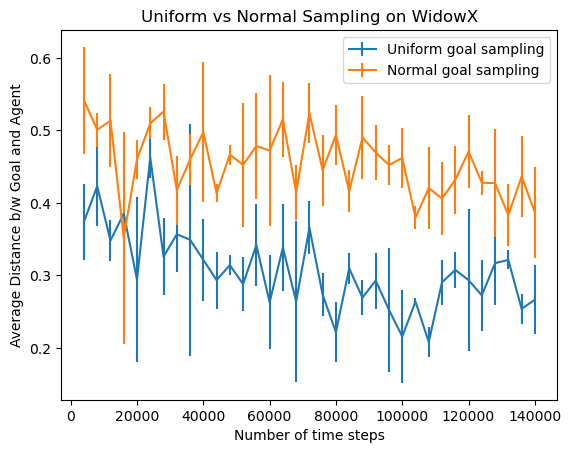

In [45]:
log_file_path_exp1 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-07/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-13/log_data.csv"
log_file_path_exp3 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_04-38-23/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)


y1_dist_goal_agent = log_data_exp1['eval_euclidean_distance_Average']; print(len(y1_dist_goal_agent))
y2_dist_goal_agent = log_data_exp2['eval_euclidean_distance_Average']; print(len(y2_dist_goal_agent))
y3_dist_goal_agent = log_data_exp3['eval_euclidean_distance_Average']; print(len(y3_dist_goal_agent))


y1_dist_goal_agent = y1_dist_goal_agent[:35]
y2_dist_goal_agent = y2_dist_goal_agent[:35]
y3_dist_goal_agent = y3_dist_goal_agent[:35]

y_avg_dist_goal_agent = []
for i in range(len(y1_dist_goal_agent)):
    y_avg_dist_goal_agent.append((float(y1_dist_goal_agent[i]) + float(y2_dist_goal_agent[i]) + float(y3_dist_goal_agent[i])) / 3)

# best mean of avg returns until that index
# best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent = np.array([y1_dist_goal_agent, y2_dist_goal_agent, y3_dist_goal_agent], dtype=float)
print(y_std_dist_goal_agent.shape)
y_std_dist_goal_agent = np.std(y_std_dist_goal_agent, axis=0)

########################################################################################################

# read the data
log_file_path_exp1_norm = "../data/hw4_q2_widowx_normal_widowx_01-04-2024_23-52-47/log_data.csv"
log_file_path_exp2_norm = "../data/hw4_q2_widowx_normal_widowx_01-04-2024_22-18-11/log_data.csv"
log_file_path_exp3_norm = "../data/hw4_q2_widowx_normal_widowx_01-04-2024_14-11-12/log_data.csv"

log_data_exp1_norm = pd.read_csv(log_file_path_exp1_norm)
log_data_exp2_norm = pd.read_csv(log_file_path_exp2_norm)
log_data_exp3_norm = pd.read_csv(log_file_path_exp3_norm)

x_timesteps = log_data_exp1_norm['step']

y1_dist_goal_agent_norm = log_data_exp1_norm['eval_euclidean_distance_Average']; print(len(y1_dist_goal_agent_norm))
y2_dist_goal_agent_norm = log_data_exp2_norm['eval_euclidean_distance_Average']; print(len(y2_dist_goal_agent_norm))
y3_dist_goal_agent_norm = log_data_exp3_norm['eval_euclidean_distance_Average']; print(len(y3_dist_goal_agent_norm))

y1_dist_goal_agent_norm = y1_dist_goal_agent_norm[:35]
y2_dist_goal_agent_norm = y2_dist_goal_agent_norm[:35]
y3_dist_goal_agent_norm = y3_dist_goal_agent_norm[:35]
x_timesteps = x_timesteps[:35]

y_avg_dist_goal_agent_norm = []
for i in range(len(y1_dist_goal_agent_norm)):
    y_avg_dist_goal_agent_norm.append((float(y1_dist_goal_agent_norm[i]) + float(y2_dist_goal_agent_norm[i]) + float(y3_dist_goal_agent_norm[i])) / 3)

# best mean of avg returns until that index
# best_mean_so_far = [np.max(y_avg_dist_goal_agent[:i+1]) for i in range(len(y_avg_dist_goal_agent))]

# cal. std dev of the mean curve
y_std_dist_goal_agent_norm = np.array([y1_dist_goal_agent_norm, y2_dist_goal_agent_norm, y3_dist_goal_agent_norm], dtype=float)
print(y_std_dist_goal_agent_norm.shape)
y_std_dist_goal_agent_norm = np.std(y_std_dist_goal_agent_norm, axis=0)


## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y_avg_dist_goal_agent, y_std_dist_goal_agent, label='Uniform goal sampling')
ax.errorbar(x_timesteps, y_avg_dist_goal_agent_norm, y_std_dist_goal_agent_norm, label='Normal goal sampling')

# plot the best mean so far
# ax.plot(x_timesteps, best_mean_so_far, label='Best Mean So Far', color='red')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average Distance b/w Goal and Agent")
ax.legend()
ax.set_title("Uniform vs Normal Sampling on WidowX")
plt.show()



# Q3

### Reacher

100
100
50
50
50
50


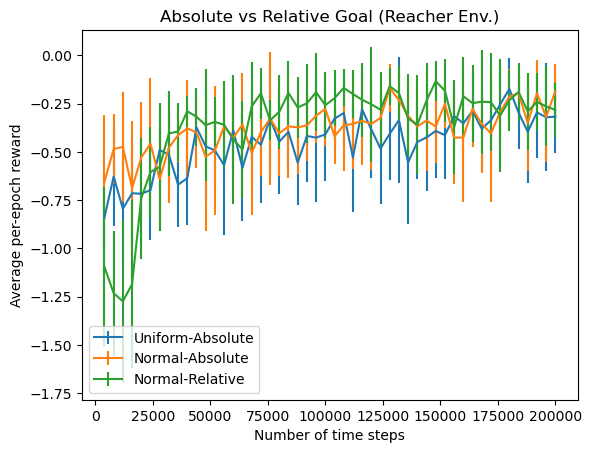

In [46]:
# read the data
log_file_path_exp1 = "../data/hw4_q1_reacher_reacher_30-03-2024_19-20-10/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_reacher_normal_reacher_01-04-2024_21-34-54/log_data.csv"
log_file_path_exp3 = "../data/hw4_q3_reacher_normal_relative_reacher_01-04-2024_22-23-49/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

idx = [i*2 for i in range(50)]

# plot it
y1_avg_reward = log_data_exp1['eval_reward_Average']; print(len(y1_avg_reward))
y1_std_reward = log_data_exp1['eval_reward_Std']; print(len(y1_std_reward))
y1_avg_reward = [y1_avg_reward[i] for i in idx]
y1_std_reward = [y1_std_reward[i] for i in idx]

y2_avg_reward = log_data_exp2['eval_reward_Average']; print(len(y2_avg_reward))
y2_std_reward = log_data_exp2['eval_reward_Std']; print(len(y2_std_reward))
# y2_avg_reward = [y2_avg_reward[i] for i in idx]
# y2_std_reward = [y2_std_reward[i] for i in idx]

y3_avg_reward = log_data_exp3['eval_reward_Average']; print(len(y3_avg_reward))
y3_std_reward = log_data_exp3['eval_reward_Std']; print(len(y3_std_reward))
# y3_avg_reward = [y3_avg_reward[i] for i in idx]
# y3_std_reward = [y3_std_reward[i] for i in idx]

x_timesteps = log_data_exp2['step']
# x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reward, y1_std_reward, label='Uniform-Absolute')
ax.errorbar(x_timesteps, y2_avg_reward, y2_std_reward, label='Normal-Absolute')
ax.errorbar(x_timesteps, y3_avg_reward, y3_std_reward, label='Normal-Relative')


# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Absolute vs Relative Goal (Reacher Env.)")
plt.show()


100
100
50
50
50
50


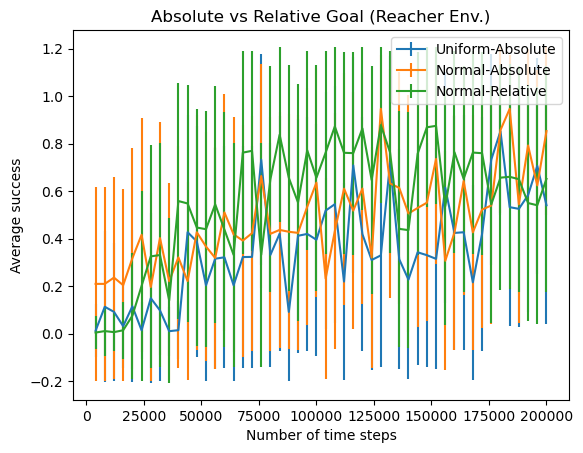

In [47]:
# read the data
log_file_path_exp1 = "../data/hw4_q1_reacher_reacher_30-03-2024_19-20-10/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_reacher_normal_reacher_01-04-2024_21-34-54/log_data.csv"
log_file_path_exp3 = "../data/hw4_q3_reacher_normal_relative_reacher_01-04-2024_22-23-49/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

idx = [i*2 for i in range(50)]

# plot it
y1_avg_reached_goal = log_data_exp1['eval_reached_goal_Average']; print(len(y1_avg_reached_goal))
y1_std_reached_goal = log_data_exp1['eval_reached_goal_Std']; print(len(y1_std_reached_goal))
y1_avg_reached_goal = [y1_avg_reached_goal[i] for i in idx]
y1_std_reached_goal = [y1_std_reached_goal[i] for i in idx]

y2_avg_reached_goal = log_data_exp2['eval_reached_goal_Average']; print(len(y2_avg_reached_goal))
y2_std_reached_goal = log_data_exp2['eval_reached_goal_Std']; print(len(y2_std_reached_goal))
# y2_avg_reached_goal = [y2_avg_reached_goal[i] for i in idx]
# y2_std_reached_goal = [y2_std_reached_goal[i] for i in idx]

y3_avg_reached_goal = log_data_exp3['eval_reached_goal_Average']; print(len(y3_avg_reached_goal))
y3_std_reached_goal = log_data_exp3['eval_reached_goal_Std']; print(len(y3_std_reached_goal))
# y3_avg_reached_goal = [y3_avg_reached_goal[i] for i in idx]
# y3_std_reached_goal = [y3_std_reached_goal[i] for i in idx]

x_timesteps = log_data_exp2['step']
# x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reached_goal, y1_std_reached_goal, label='Uniform-Absolute')
ax.errorbar(x_timesteps, y2_avg_reached_goal, y2_std_reached_goal, label='Normal-Absolute')
ax.errorbar(x_timesteps, y3_avg_reached_goal, y3_std_reached_goal, label='Normal-Relative')


# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average success")
ax.legend()
ax.set_title("Absolute vs Relative Goal (Reacher Env.)")
plt.show()


### WidowX

65
65
65
65
65
65


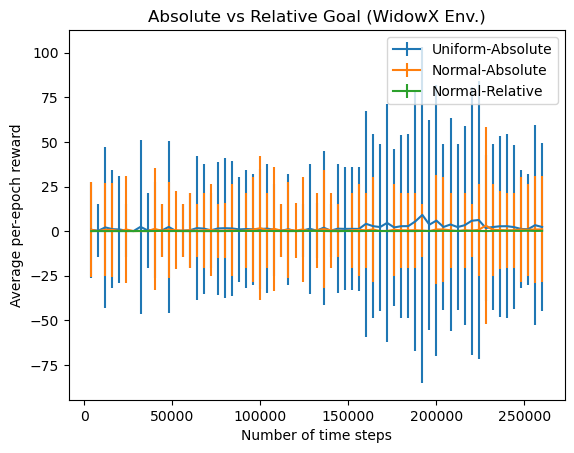

In [49]:
# read the data
log_file_path_exp1 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-07/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_widowx_normal_widowx_01-04-2024_23-52-47/log_data.csv"
log_file_path_exp3 = "../data/hw4_q3_widowx_normal_relative_widowx_01-04-2024_22-32-15/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

log_data_exp1 = log_data_exp1[:65]
log_data_exp2 = log_data_exp2[:65]
log_data_exp3 = log_data_exp3[:65]

# plot it
y1_avg_reward = log_data_exp1['eval_reward_Average']; print(len(y1_avg_reward))
y1_std_reward = log_data_exp1['eval_reward_Std']; print(len(y1_std_reward))
# y1_avg_reward = [y1_avg_reward[i] for i in idx]
# y1_std_reward = [y1_std_reward[i] for i in idx]

y2_avg_reward = log_data_exp2['eval_reward_Average']; print(len(y2_avg_reward))
y2_std_reward = log_data_exp2['eval_reward_Std']; print(len(y2_std_reward))
# y2_avg_reward = [y2_avg_reward[i] for i in idx]
# y2_std_reward = [y2_std_reward[i] for i in idx]

y3_avg_reward = log_data_exp3['eval_reward_Average']; print(len(y3_avg_reward))
y3_std_reward = log_data_exp3['eval_reward_Std']; print(len(y3_std_reward))
# y3_avg_reward = [y3_avg_reward[i] for i in idx]
# y3_std_reward = [y3_std_reward[i] for i in idx]

x_timesteps = log_data_exp2['step']
# x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reward, y1_std_reward, label='Uniform-Absolute')
ax.errorbar(x_timesteps, y2_avg_reward, y2_std_reward, label='Normal-Absolute')
ax.errorbar(x_timesteps, y3_avg_reward, y3_std_reward, label='Normal-Relative')


# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Absolute vs Relative Goal (WidowX Env.)")
plt.show()


65
65
65
65
65
65


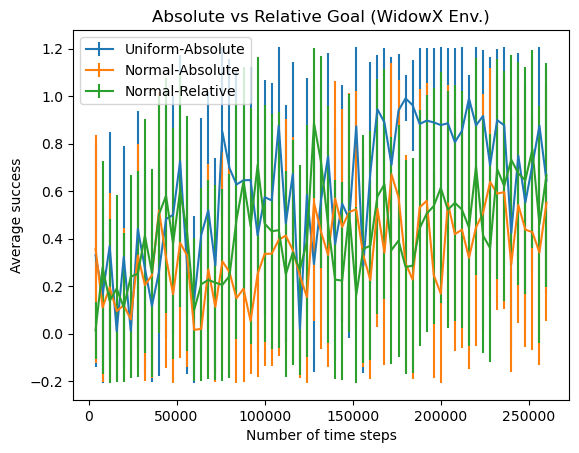

In [50]:
# read the data
log_file_path_exp1 = "../data/hw4_q2_widowx_uniform_widowx_01-04-2024_02-28-07/log_data.csv"
log_file_path_exp2 = "../data/hw4_q2_widowx_normal_widowx_01-04-2024_23-52-47/log_data.csv"
log_file_path_exp3 = "../data/hw4_q3_widowx_normal_relative_widowx_01-04-2024_22-32-15/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

log_data_exp1 = log_data_exp1[:65]
log_data_exp2 = log_data_exp2[:65]
log_data_exp3 = log_data_exp3[:65]

# plot it
y1_avg_reward = log_data_exp1['eval_reached_goal_Average']; print(len(y1_avg_reward))
y1_std_reward = log_data_exp1['eval_reached_goal_Std']; print(len(y1_std_reward))
# y1_avg_reward = [y1_avg_reward[i] for i in idx]
# y1_std_reward = [y1_std_reward[i] for i in idx]

y2_avg_reward = log_data_exp2['eval_reached_goal_Average']; print(len(y2_avg_reward))
y2_std_reward = log_data_exp2['eval_reached_goal_Std']; print(len(y2_std_reward))
# y2_avg_reward = [y2_avg_reward[i] for i in idx]
# y2_std_reward = [y2_std_reward[i] for i in idx]

y3_avg_reward = log_data_exp3['eval_reached_goal_Average']; print(len(y3_avg_reward))
y3_std_reward = log_data_exp3['eval_reached_goal_Std']; print(len(y3_std_reward))
# y3_avg_reward = [y3_avg_reward[i] for i in idx]
# y3_std_reward = [y3_std_reward[i] for i in idx]

x_timesteps = log_data_exp2['step']
# x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reward, y1_std_reward, label='Uniform-Absolute')
ax.errorbar(x_timesteps, y2_avg_reward, y2_std_reward, label='Normal-Absolute')
ax.errorbar(x_timesteps, y3_avg_reward, y3_std_reward, label='Normal-Relative')


# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average success")
ax.legend()
ax.set_title("Absolute vs Relative Goal (WidowX Env.)")
plt.show()


# Q4

250
250
75
75
59
59


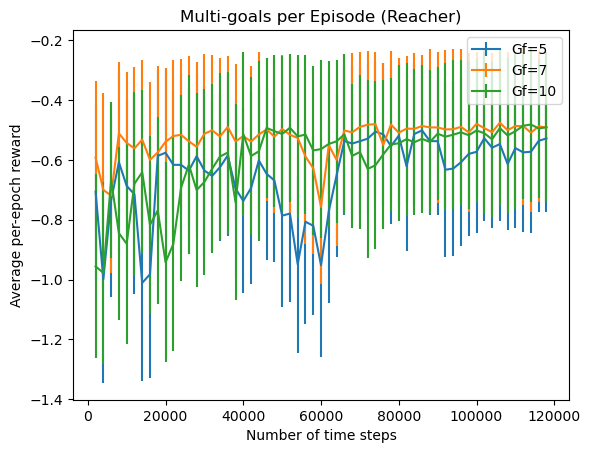

In [9]:
# read the data
log_file_path_exp1 = "../data/hw4_q4_reacher_normal_gf5_reacher_31-03-2024_14-51-06/log_data.csv"
log_file_path_exp2 = "../data/hw4_q4_reacher_normal_gf7_reacher_02-04-2024_00-33-05/log_data.csv"
log_file_path_exp3 = "../data/hw4_q4_reacher_normal_gf10_reacher_31-03-2024_03-17-09/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

idx = [i*5 for i in range(50)]
# plot it
y1_avg_reward = log_data_exp1['eval_reward_Average']; print(len(y1_avg_reward))
y1_std_reward = log_data_exp1['eval_reward_Std']; print(len(y1_std_reward))

y1_avg_reward = y1_avg_reward[:59]
y1_std_reward = y1_std_reward[:59]

# y1_avg_reward = [y1_avg_reward[i] for i in idx]
# y1_std_reward = [y1_std_reward[i] for i in idx]

y2_avg_reward = log_data_exp2['eval_reward_Average']; print(len(y2_avg_reward))
y2_std_reward = log_data_exp2['eval_reward_Std']; print(len(y2_std_reward))

y2_avg_reward = y2_avg_reward[:59]
y2_std_reward = y2_std_reward[:59]

# y2_avg_reward = [y2_avg_reward[i] for i in idx]
# y2_std_reward = [y2_std_reward[i] for i in idx]

y3_avg_reward = log_data_exp3['eval_reward_Average']; print(len(y3_avg_reward))
y3_std_reward = log_data_exp3['eval_reward_Std']; print(len(y3_std_reward))

y3_avg_reward = y3_avg_reward[:59]
y3_std_reward = y3_std_reward[:59]

# y3_avg_reward = [y3_avg_reward[i] for i in idx]
# y3_std_reward = [y3_std_reward[i] for i in idx]

x_timesteps = log_data_exp1['step']
x_timesteps = x_timesteps[:59]
# x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reward, y1_std_reward, fmt='-', label='Gf=5')
ax.errorbar(x_timesteps, y2_avg_reward, y2_std_reward, fmt='-', label='Gf=7')
ax.errorbar(x_timesteps, y3_avg_reward, y3_std_reward, fmt='-', label='Gf=10')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Multi-goals per Episode (Reacher)")
plt.show()


250
250
75
75
59
59


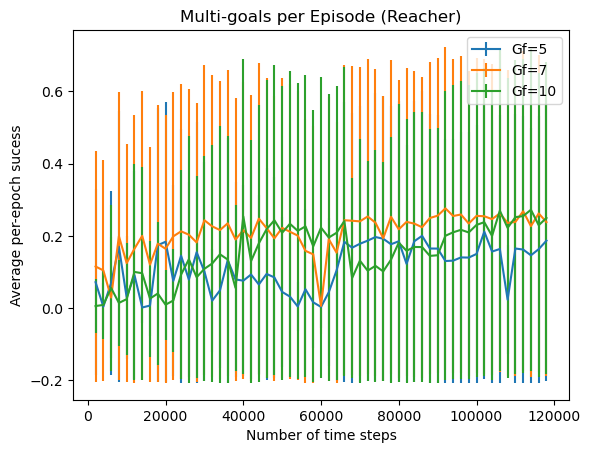

In [11]:
y1_avg_reached_goal = log_data_exp1['eval_reached_goal_Average']; print(len(y1_avg_reached_goal))
y1_std_reached_goal = log_data_exp1['eval_reached_goal_Std']; print(len(y1_std_reached_goal))

y2_avg_reached_goal = log_data_exp2['eval_reached_goal_Average']; print(len(y2_avg_reached_goal))
y2_std_reached_goal = log_data_exp2['eval_reached_goal_Std']; print(len(y2_std_reached_goal))

y3_avg_reached_goal = log_data_exp3['eval_reached_goal_Average']; print(len(y3_avg_reached_goal))
y3_std_reached_goal = log_data_exp3['eval_reached_goal_Std']; print(len(y3_std_reached_goal))

# y1_avg_reached_goal = [y1_avg_reached_goal[i] for i in idx]
# y1_std_reached_goal = [y1_std_reached_goal[i] for i in idx]

y1_avg_reached_goal = y1_avg_reached_goal[:59]
y2_avg_reached_goal = y2_avg_reached_goal[:59]
y3_avg_reached_goal = y3_avg_reached_goal[:59]

y1_std_reached_goal = y1_std_reached_goal[:59]
y2_std_reached_goal = y2_std_reached_goal[:59]
y3_std_reached_goal = y3_std_reached_goal[:59]

x_timesteps = log_data_exp1['step']
# x_timesteps = [x_timesteps[i] for i in idx]

x_timesteps = x_timesteps[:59]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reached_goal, y1_std_reached_goal, fmt='-', label='Gf=5')
ax.errorbar(x_timesteps, y2_avg_reached_goal, y2_std_reached_goal, fmt='-', label='Gf=7')
ax.errorbar(x_timesteps, y3_avg_reached_goal, y3_std_reached_goal, fmt='-', label='Gf=10')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch sucess")
ax.legend()
ax.set_title("Multi-goals per Episode (Reacher)")
plt.show()


# Q5

216
216


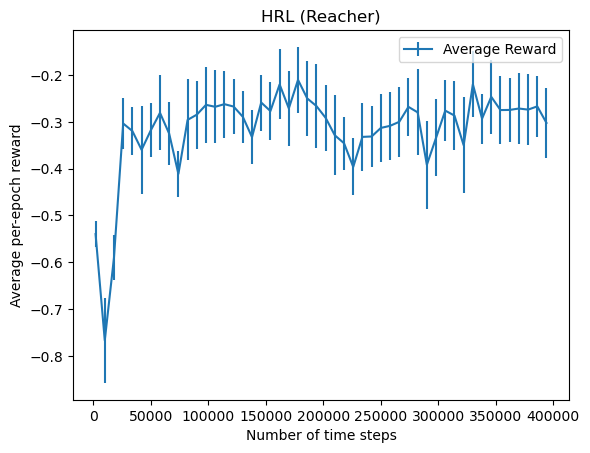

In [52]:
# read the data
log_file_path_exp1 = "../data/hw4_q5_hrl_gf5_reacher_31-03-2024_22-24-42/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)

idx = [i*4 for i in range(50)]

# plot it
y1_avg_reward = log_data_exp1['eval_reward_Average']; print(len(y1_avg_reward))
y1_std_reward = log_data_exp1['eval_reward_Std']; print(len(y1_std_reward))

y1_avg_reward = [y1_avg_reward[i] for i in idx]
y1_std_reward = [y1_std_reward[i] for i in idx]

x_timesteps = log_data_exp1['step']
x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reward, y1_std_reward, fmt='-', label='Average Reward')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("HRL (Reacher)")
plt.show()


216
216


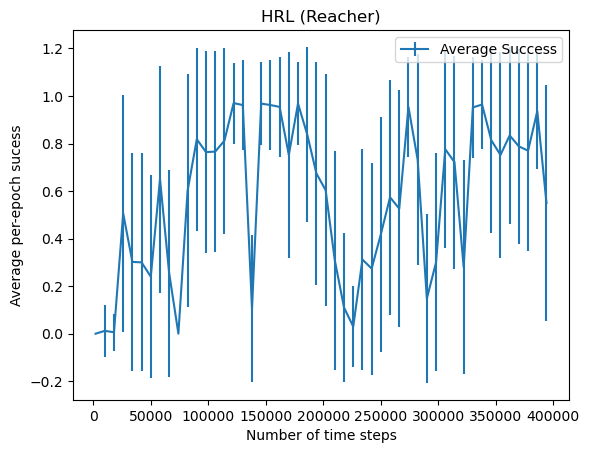

In [30]:
y1_avg_reached_goal = log_data_exp1['eval_reached_goal_Average']; print(len(y1_avg_reached_goal))
y1_std_reached_goal = log_data_exp1['eval_reached_goal_Std']; print(len(y1_std_reached_goal))

idx = [i*4 for i in range(50)]

y1_avg_reached_goal = [y1_avg_reached_goal[i] for i in idx]
y1_std_reached_goal = [y1_std_reached_goal[i] for i in idx]

x_timesteps = log_data_exp1['step']
x_timesteps = [x_timesteps[i] for i in idx]

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_reached_goal, y1_std_reached_goal, fmt='-', label='Average Success')

# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch sucess")
ax.legend()
ax.set_title("HRL (Reacher)")
plt.show()
